# Generate Synthetic Iris-Data

In [1]:
from sklearn.datasets import load_iris
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import Metadata
import pandas as pd


In [2]:


# Iris-Daten laden
iris = load_iris(as_frame=True)
df = iris.frame
df['target'] = df['target'].astype(str)  # Kategorisch

# Parameter
classes = df['target'].unique()
samples_per_class = 100000

# Metadaten einmal erzeugen
metadata = Metadata.detect_from_dataframe(
    data=df,
    table_name='iris'
)

# Liste für alle synthetischen Teildatensätze
all_synthetic = []

# Für jede Klasse ein eigenes Modell trainieren
for cls in classes:
    print(f"Trainiere Modell für Klasse {cls}...")

    df_cls = df[df['target'] == cls].copy()

    # Synthesizer mit Metadata initialisieren
    synthesizer = CTGANSynthesizer(metadata)
    synthesizer.fit(df_cls)

    # Neue Daten erzeugen
    synthetic = synthesizer.sample(num_rows=samples_per_class)

    # Zielklasse korrekt setzen (sicherstellen)
    synthetic['target'] = cls

    # Synthetische Daten speichern
    all_synthetic.append(synthetic)

# Alles zusammenführen
synthetic_total = pd.concat(all_synthetic, ignore_index=True)

# Ausgabe prüfen
print(synthetic_total.head())
print(f"/nGesamtanzahl synthetischer Zeilen: {len(synthetic_total)}")

# In CSV-Datei speichern
synthetic_total.to_csv('iris_synthetic.csv', header=False, index=False)


Trainiere Modell für Klasse 0...


c:\Users\svenr\scoop\persist\miniconda3\envs\krn\Lib\site-packages\sdv\single_table\base.py:128: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Trainiere Modell für Klasse 1...
Trainiere Modell für Klasse 2...
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               4.0                1.4               0.2   
1                5.2               3.5                1.5               0.2   
2                4.9               3.5                1.5               0.3   
3                4.7               3.8                1.5               0.3   
4                5.5               3.6                1.5               0.2   

  target  
0      0  
1      0  
2      0  
3      0  
4      0  
/nGesamtanzahl synthetischer Zeilen: 300000



![alt text](../img/gan-comparison/original-iris-means.png)
![alt text](../img/gan-comparison/synthetic-iris-means.png)

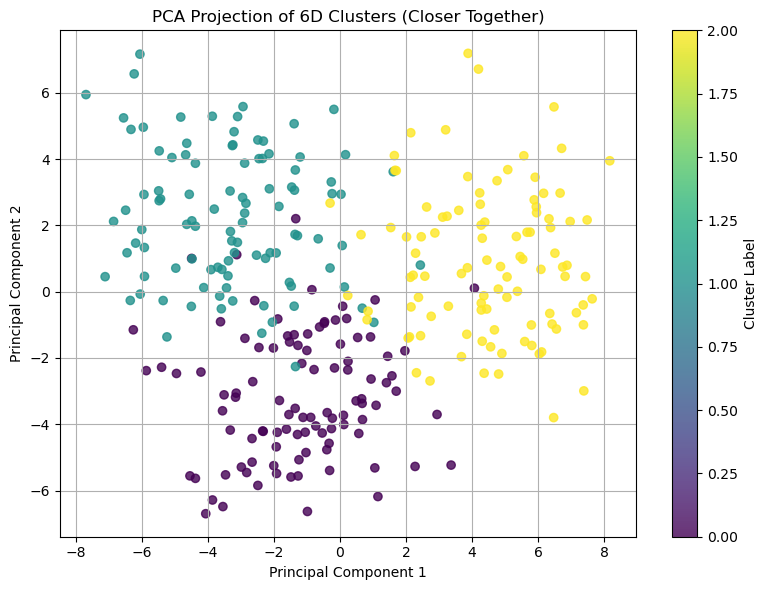

CSV saved as 'synthetic_6d_clusters.csv'


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ==== Parameters ====
np.random.seed(42)
num_clusters = 3
points_per_cluster = 100
dimensions = 6

# Step 1: Generate closer cluster centers
centers = np.random.uniform(low=-3, high=3, size=(num_clusters, dimensions))

# Step 2: Generate tighter Gaussian clusters
data = []
labels = []

for cluster_id, center in enumerate(centers):
    points = np.random.normal(loc=center, scale=2, size=(points_per_cluster, dimensions))
    data.append(points)
    labels.extend([cluster_id] * points_per_cluster)

data = np.vstack(data)
labels = np.array(labels)

# Step 3: PCA Projection to 2D
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Step 4: Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.8)

plt.title("PCA Projection of 6D Clusters (Closer Together)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Cluster Label")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Save the 6D data with labels to CSV
df = pd.DataFrame(data, columns=[f"feature_{i+1}" for i in range(dimensions)])
df["target"] = labels
df.to_csv("synthetic_6d_clusters.csv", index=False, header=False)
print("CSV saved as 'synthetic_6d_clusters.csv'")
